## Support Vector Machine (SVM)

SVM is used for classification as well.

- Inputs: features (not necessarily independent)
  - Features should be scaled
- Output: classes, separated by "hyperplane"

- SVM uses "kernel functions" to compute the similarity between input samples
- Find hyperplane with the maximum margin of separation

In [1]:
# we are going to import everything
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv('SVM_Gender.csv')
df.head()

,Hair_length,Height,Gender
0,5.0,185,M
1,25.0,155,F
2,4.1,175,M
3,4.2,180,M
4,3.9,182,M


In [3]:
# this is used for labelling the data
dict = {
    'M': 0,
    'F': 1
}

In [4]:
df['Gender'] = df['Gender'].map(dict)

In [5]:
df.head()

,Hair_length,Height,Gender
0,5.0,185,0
1,25.0,155,1
2,4.1,175,0
3,4.2,180,0
4,3.9,182,0


In [6]:
#change the Gender column into numeric classes
df_male = df[df['Gender'] == 0]
df_female = df[df['Gender'] == 1]
df_male.head()

,Hair_length,Height,Gender
0,5.0,185,0
2,4.1,175,0
3,4.2,180,0
4,3.9,182,0
7,10.0,173,0


After mapping, we have
a: 0, b: 1

### Visualize our data

First, we can plot all the data points by their category. The plot can show us what kind of
hyperplane needs to be used

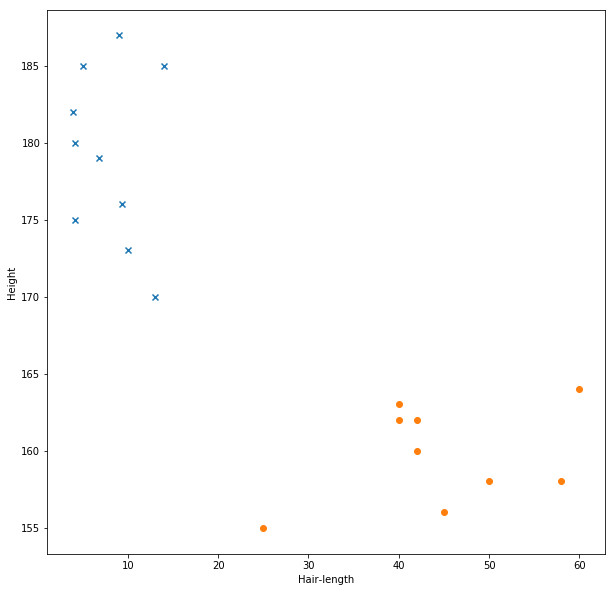

In [7]:
fig, ax = plt.subplots(figsize=(10,10))

# plot male data as cross
# plot female data as circle
ax.scatter(df_male['Hair_length'], df_male['Height'], marker = 'x')
ax.scatter(df_female['Hair_length'], df_female['Height'], marker = 'o')
ax.set(xlabel = 'Hair-length', ylabel = 'Height')
plt.show()

### Traing the model

we can now split the training set and testing set, then start training our model

In [8]:
from sklearn.model_selection import train_test_split

X = df[['Hair_length', 'Height']]
y = df['Gender']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [10]:
X_train.head()

,Hair_length,Height
16,14.0,185
3,4.2,180
13,42.0,162
15,40.0,163
17,45.0,156


In [11]:
# import the support vector classifier from sklearn.svm

from sklearn.svm import SVC

svClassifier = SVC(kernel = 'linear')
svClassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### Test our model

After training, we can use  our svm to predict new data's class/labels

In [12]:
y_test

0     0
5     1
11    1
1     1
8     0
Name: Gender, dtype: int64

In [13]:
y_pred = svClassifier.predict(X_test)
y_pred # predicted result

array([0, 1, 1, 1, 0], dtype=int64)

In [14]:
print(svClassifier.predict([[5, 180]]))

[0]


In [15]:
print(svClassifier.predict([[45, 150]]))

[1]


In [16]:
from sklearn.metrics import accuracy_score
# show how accurate the model can predict
accuracy_score(y_test, y_pred)

1.0